# Определение стоимости автомобилей

[Загрузка и подготовка данных](#Загрузка-и-подготовка-данных)

[Обучение моделей](#Обучение-моделей)

[Анализ моделей](#Анализ-моделей)

# Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/datasets/autos.csv')
# display(data.head(10))
display(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


None

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


## Загрузка и подготовка данных

In [2]:
print(data.isnull().sum())
print(data.duplicated().sum())

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64
4


In [3]:
autos = data.copy()
autos['DateCrawled'].sort_values() # анкеты выкачивались с марта по апрель 2016 года

329497    2016-03-05 14:06:22
220583    2016-03-05 14:06:23
176823    2016-03-05 14:06:24
99885     2016-03-05 14:06:24
324763    2016-03-05 14:06:24
                 ...         
204218    2016-04-07 14:36:53
53739     2016-04-07 14:36:54
301030    2016-04-07 14:36:55
339649    2016-04-07 14:36:56
90713     2016-04-07 14:36:58
Name: DateCrawled, Length: 354369, dtype: object

In [4]:
autos['DateCreated'].sort_values() # самая ранняя анкета создана в марте 2014 года, самая поздняя в апреле 2016.

61207     2014-03-10 00:00:00
4001      2015-03-20 00:00:00
342275    2015-06-18 00:00:00
86601     2015-08-07 00:00:00
175103    2015-08-10 00:00:00
                 ...         
134418    2016-04-07 00:00:00
176987    2016-04-07 00:00:00
206303    2016-04-07 00:00:00
309336    2016-04-07 00:00:00
305430    2016-04-07 00:00:00
Name: DateCreated, Length: 354369, dtype: object

In [5]:
autos['LastSeen'].sort_values() # последняя активность пользователей отмечена в марте-апреле 2016.

296785    2016-03-05 14:15:08
262341    2016-03-05 14:15:16
130462    2016-03-05 14:15:39
285695    2016-03-05 14:18:30
169065    2016-03-05 14:25:59
                 ...         
54852     2016-04-07 14:58:50
59506     2016-04-07 14:58:50
116344    2016-04-07 14:58:50
215705    2016-04-07 14:58:50
327303    2016-04-07 14:58:51
Name: LastSeen, Length: 354369, dtype: object

In [6]:
actual_autos_data = autos.query('RegistrationYear >= 1986 and RegistrationYear < 2016 and Power < 2000')
fig_reg_year = px.histogram(actual_autos_data, x = 'RegistrationYear', marginal = 'box', title = 'Распределение '+ 'RegistrationYear')
# fig_reg_year.show()
fig_power = px.histogram(actual_autos_data, x = 'Power', marginal = 'box', title = 'Распределение '+ 'Power')
# fig_power.show()

In [7]:
# actual_autos_data['Power'].value_counts()
autos['Power'].value_counts()

0        40225
75       24023
60       15897
150      14590
101      13298
         ...  
16311        1
1360         1
1968         1
6226         1
6006         1
Name: Power, Length: 712, dtype: int64

In [8]:
actual_autos_data[['VehicleType', 'Gearbox', 'FuelType', 'Model', 'NotRepaired']] = actual_autos_data[['VehicleType', 'Gearbox', 'FuelType', 'Model', 'NotRepaired']].fillna('unknown')
print(actual_autos_data.isnull().sum())
actual_autos_data['Price'].value_counts()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        8837
500      5093
1500     4850
1200     4136
1000     4114
         ... 
5697        1
2004        1
2996        1
11985       1
8188        1
Name: Price, Length: 3645, dtype: int64

In [9]:
actual_autos_data['Price'] = actual_autos_data['Price'].replace(0, float('Nan'))
actual_autos_data = actual_autos_data.dropna()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
actual_autos_data['Price'].value_counts()
print(actual_autos_data.isnull().sum())

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


In [11]:
horse_forse = actual_autos_data[actual_autos_data['Power'] != 0].groupby(['Model', 'Brand'])['Power'].agg('median')

def horsy_forsy(row):
    power = row['Power']
    if power == 0:
        model = row['Model']
        brand = row['Brand']
        row['Power'] = horse_forse[model, brand]
    return row

actual_autos_data = actual_autos_data.apply(horsy_forsy, axis=1)

print(actual_autos_data['Power'].value_counts())
print(actual_autos_data.head(10))

75.0      22630
60.0      17716
150.0     16158
101.0     15009
90.0      12734
          ...  
1596.0        1
1597.0        1
1199.0        1
544.0         1
1501.0        1
Name: Power, Length: 586, dtype: int64
            DateCrawled    Price  VehicleType  RegistrationYear Gearbox  \
0   2016-03-24 11:52:17    480.0      unknown              1993  manual   
1   2016-03-24 10:58:45  18300.0        coupe              2011  manual   
2   2016-03-14 12:52:21   9800.0          suv              2004    auto   
3   2016-03-17 16:54:04   1500.0        small              2001  manual   
4   2016-03-31 17:25:20   3600.0        small              2008  manual   
5   2016-04-04 17:36:23    650.0        sedan              1995  manual   
6   2016-04-01 20:48:51   2200.0  convertible              2004  manual   
8   2016-04-04 23:42:13  14500.0          bus              2014  manual   
9   2016-03-17 10:53:50    999.0        small              1998  manual   
10  2016-03-26 19:54:18   2000.0   

In [12]:
actual_autos_data = actual_autos_data.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures', 'RegistrationMonth', 'PostalCode'], axis=1)

In [13]:
actual_autos_data['NotRepaired'] = pd.get_dummies(actual_autos_data['NotRepaired'], drop_first=True)
print(actual_autos_data['NotRepaired'].value_counts())

0    261116
1     53981
Name: NotRepaired, dtype: int64


In [14]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
actual_autos_data[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']] = pd.DataFrame(encoder.fit_transform(actual_autos_data[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']]), columns=[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']], index=actual_autos_data.index)

In [15]:
print(actual_autos_data)

          Price  VehicleType  RegistrationYear  Gearbox  Power  Model  \
0         480.0          7.0              1993      1.0  101.0  116.0   
1       18300.0          2.0              2011      1.0  190.0  225.0   
2        9800.0          6.0              2004      0.0  163.0  117.0   
3        1500.0          5.0              2001      1.0   75.0  116.0   
4        3600.0          5.0              2008      1.0   69.0  101.0   
...         ...          ...               ...      ...    ...    ...   
354363   1150.0          0.0              2000      1.0  125.0  247.0   
354365   2200.0          7.0              2005      2.0  150.0  225.0   
354366   1199.0          1.0              2000      0.0  101.0  106.0   
354367   9200.0          0.0              1996      1.0  102.0  221.0   
354368   3400.0          8.0              2002      1.0  100.0  116.0   

        Kilometer  FuelType  Brand  NotRepaired  
0          150000       6.0   38.0            1  
1          125000      

### Вывод 

* В столбце стоимость (Price) обнаружилось больше 10000 нулевых значений. Нулевые значения в столбце 'Price' не помогут нам предсказать цену - удаляем.
* Год регистрации (RegistrationYear): самая поздняя анкета была создана в апреле 2016. Считаем, что регистрации автомобилей позже апреля 2016 года и ранее 1986 года быть не должно. Тачки старше 1986 года относятся к винтажным и их нужно оценивать с помощью специально обученного человека.
* Восстановить пропущенные данные по типу кузова (VehicleType), коробке передач (Gearbox) и типу топлива (FuelType) представляется очень сложной задачей, поэтому пропуски пометим как неизвестное (unknown). Так же поступим с моделью автомобиля (Model) и была машина в ремонте или нет (NotRepaired).
* В столбце мощность (Power) обнаружилось значение 0 л.с. в количестве более 40000 строк, что составляет 11% данных. Попробуем заполнить данными из датасета по аналогичным моделям. Отсекла авто с мощностью более 2000 л.с., так как нашла информацию о том, что одним из самых мощных авто является 2020 Koenigsegg Gemera Prototype - 1724 л.с.
* Дата скачивания анкеты из базы (DateCrawled), дата создания анкеты (DateCreated) и дата последней активности пользователя (LastSeen) на мой взгляд мало влияют на модель, следовательно удаляем. Так же поступим с количеством фотографий автомобиля (NumberOfPictures).
* Закодировала данные, содержащиеся в столбце 'NotRepaired' с помощью OHE.

## Обучение моделей

In [16]:
research_result = pd.DataFrame(columns=['RMSE', 'Learning_time', 'Predict_time', 'Model_name'])

In [17]:
target = actual_autos_data['Price']
features = actual_autos_data.drop(['Price'], axis=1)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [18]:
def fit_time(model, f_train, t_train):
    start = time.time()
    model.fit(f_train, t_train)
    end = time.time()
    
    learning_time = end - start
    return learning_time, model

In [19]:
def predict_time(model, f_test):
    start = time.time()
    prediction = model.predict(f_test)
    end = time.time()
    
    prediction_time = end - start
    return prediction_time, prediction, model

In [20]:
def give_me_importance (model_name):
    feature_importances = (pd.DataFrame(model_name.feature_importances_, index=features.columns, columns=['Importance'])
                      .sort_values(by='Importance', ascending=False))
    display(feature_importances)
    feature_importances.plot(kind='barh', figsize=(10, 8))
    plt.title('Importance')
    plt.show()

In [21]:
model_regression = LinearRegression()

learning_time, model_regression_fitted = fit_time(model_regression, features_train, target_train)
print('learning_time', learning_time)
prediction_time, prediction, model = predict_time(model_regression_fitted, features_test)
print('prediction_time', prediction_time)
RMSE_regression = np.sqrt(mean_squared_error(target_test, prediction)) 
print("RMSE_regression =", RMSE_regression)

research_result.loc[0, 'Model_name']='LinearRegression'
research_result.loc[0, 'Learning_time']=learning_time
research_result.loc[0, 'Predict_time']=prediction_time
research_result.loc[0, 'RMSE']=RMSE_regression

print(model_regression.coef_)

learning_time 0.05525994300842285
prediction_time 0.044899940490722656
RMSE_regression = 2855.8251360876757
[-1.71168984e+02  4.03080212e+02 -9.57987458e+02  2.47900181e+01
 -9.41111160e-01 -2.56455543e-02 -2.63457603e+02  3.23647831e+00
 -4.73708004e+02]


learning_time 1.1425671577453613
prediction_time 0.03470802307128906
RMSE_tree = 1751.9332105336273


,Importance
RegistrationYear,0.604330
Power,0.242952
Brand,0.034487
VehicleType,0.032854
Model,0.032332
Kilometer,0.030273
Gearbox,0.011335
FuelType,0.008752
NotRepaired,0.002686


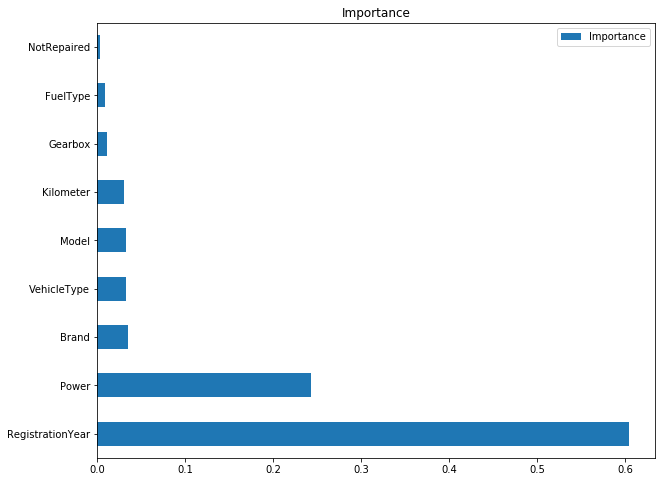

In [22]:
model_tree = DecisionTreeRegressor(max_depth=None, min_samples_leaf=3, random_state=12345)

learning_time, model_tree_fitted = fit_time(model_tree, features_train, target_train)
print('learning_time', learning_time)
prediction_time, prediction, model = predict_time(model_tree_fitted, features_test)
print('prediction_time', prediction_time)
RMSE_tree = np.sqrt(mean_squared_error(target_test, prediction)) 
print("RMSE_tree =", RMSE_tree)
research_result.loc[1, 'Model_name']='DecisionTreeRegressor'
research_result.loc[1, 'Learning_time']=learning_time
research_result.loc[1, 'Predict_time']=prediction_time
research_result.loc[1, 'RMSE']=RMSE_tree

give_me_importance (model_tree)

learning_time 13.190767288208008
prediction_time 0.4801497459411621
RMSE_forest = 1609.8582917486858


,Importance
RegistrationYear,0.607152
Power,0.246517
Brand,0.034176
VehicleType,0.031400
Kilometer,0.030308
Model,0.027234
Gearbox,0.011461
FuelType,0.008664
NotRepaired,0.003087


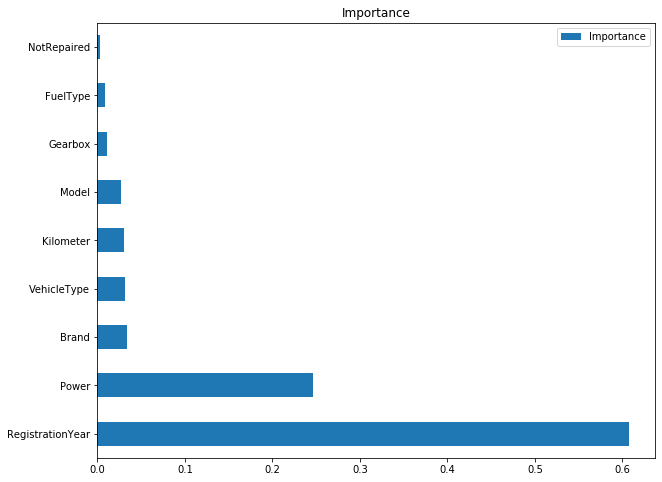

In [23]:
model_forest = RandomForestRegressor(n_estimators=20, max_depth=15, random_state=12345)

learning_time, model_forest_fitted = fit_time(model_forest, features_train, target_train)
print('learning_time', learning_time)
prediction_time, prediction, model = predict_time(model_forest_fitted, features_test)
print('prediction_time', prediction_time)
RMSE_forest = np.sqrt(mean_squared_error(target_test, prediction)) 
print("RMSE_forest =", RMSE_forest)
research_result.loc[2, 'Model_name']='RandomForestRegressor'
research_result.loc[2, 'Learning_time']=learning_time
research_result.loc[2, 'Predict_time']=prediction_time
research_result.loc[2, 'RMSE']=RMSE_forest

give_me_importance (model_forest)

learning_time 574.8261868953705
prediction_time 0.7204291820526123
RMSE_LGBMR = 1631.2165665631057


,Importance
Power,727
RegistrationYear,579
Model,477
Brand,434
VehicleType,287
Kilometer,252
FuelType,112
Gearbox,106
NotRepaired,26


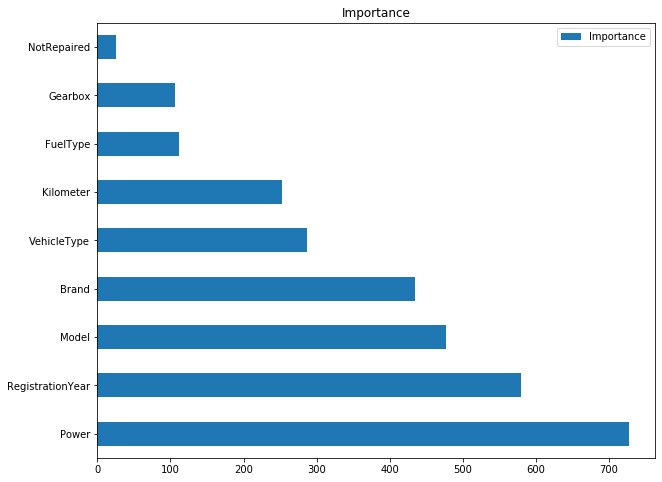

In [24]:
model_LGBMR = LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=12, learning_rate=0.2, n_estimators=100, random_state=12345)

learning_time, model_LGBMR_fitted = fit_time(model_LGBMR, features_train, target_train)
print('learning_time', learning_time)
prediction_time, prediction, model = predict_time(model_LGBMR_fitted, features_test)
print('prediction_time', prediction_time)
RMSE_LGBMR = np.sqrt(mean_squared_error(target_test, prediction)) 
print("RMSE_LGBMR =", RMSE_LGBMR)
research_result.loc[3, 'Model_name']='LGBMRegressor'
research_result.loc[3, 'Learning_time']=learning_time
research_result.loc[3, 'Predict_time']=prediction_time
research_result.loc[3, 'RMSE']=RMSE_LGBMR

give_me_importance (model_LGBMR)

learning_time 18.722574949264526
prediction_time 0.023517608642578125
RMSE_catboost = 2038.8837973878215


,Importance
RegistrationYear,43.402999
Power,36.585675
Brand,6.465519
Kilometer,5.765210
VehicleType,4.620116
Gearbox,1.659834
FuelType,0.874950
Model,0.316330
NotRepaired,0.309367


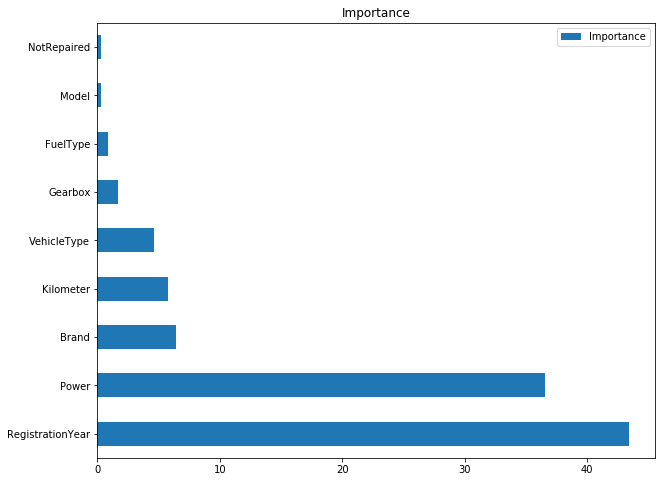

In [25]:
model_catboost = CatBoostRegressor(loss_function='RMSE', n_estimators = 100, silent = True)

learning_time, model_catboost_fitted = fit_time(model_catboost, features_train, target_train)
print('learning_time', learning_time)
prediction_time, prediction, model = predict_time(model_catboost_fitted, features_test)
print('prediction_time', prediction_time)
RMSE_catboost = np.sqrt(mean_squared_error(target_test, prediction)) 
print("RMSE_catboost =", RMSE_catboost)
research_result.loc[4, 'Model_name']='CatBoostRegressor'
research_result.loc[4, 'Learning_time']=learning_time
research_result.loc[4, 'Predict_time']=prediction_time
research_result.loc[4, 'RMSE']=RMSE_catboost

give_me_importance (model_catboost)

## Анализ моделей

In [26]:
print(research_result)

      RMSE Learning_time Predict_time             Model_name
0  2855.83     0.0552599    0.0448999       LinearRegression
1  1751.93       1.14257     0.034708  DecisionTreeRegressor
2  1609.86       13.1908      0.48015  RandomForestRegressor
3  1631.22       574.826     0.720429          LGBMRegressor
4  2038.88       18.7226    0.0235176      CatBoostRegressor


* Дерево решений предсказывает значительно лучше, чем линейная модель, однако время обучения и предсказания значительно выросло.
* Случайный лес предсказывает точнее, чем дерево решений, однако у данной модели длинее время обучения и предсказания.
* У LGB-модели качество предсказаний примерно как у случайного леса, она дольше обучается и немного медленнее предсказывает.
* Catboost-модель выдает качество предсказаний чуть лучше, чем линейная модель и имеет довольно долгое время обучения, но быстрое предсказание.
* Самая высокая точность предсказания по RMSE у случайного леса и LGB-модели, самое короткое время обучения и предсказания у линейной регрессии.